#  [Local Binary Convolutional Neural Networks](https://openaccess.thecvf.com/content_cvpr_2017/papers/Juefei-Xu_Local_Binary_Convolutional_CVPR_2017_paper.pdf)  

The image is converted into a gray sacale one.  
for each pixel we calculate if the neighbor one is greater than it.  
  
![Convolution Diagram](../../assets/lbp_thresholding.jpg)  
The eigth binaries are concatenated to represent a 256 base integer.  

![Convolution Diagram](../../assets/lbp_calculation-1024x299.jpg)

![Convolution Diagram](../../assets/lbp_to_output-1024x519.jpg)


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
from tensorflow.keras import backend as K
from matplotlib import pyplot
from PIL import Image

In [23]:

class LBPLayer(layers.Layer):
    def __init__(self):
        super(LBPLayer, self).__init__()

    def build(self, input_shape):
        self.lbp_kernel = [1 << 7, 1 << 6, 1 << 5, 1 << 4, 1 << 3, 1 << 2, 1 << 1, 1 << 0]  
        self.H = [[ 
          [[ 0, 0, 0, 0, 0, 0, 0, 1]],
          [[ 1, 0, 0, 0, 0, 0, 0, 0]],
          [[ 0, 1, 0, 0, 0, 0, 0, 0]]
          ],
          [ 
          [[ 0, 0, 0, 0, 0, 0, 1, 0]],
          [[-1,-1,-1,-1,-1,-1,-1,-1]],
          [[ 0, 0, 1, 0, 0, 0, 0, 0]]
          ],
          [ 
          [[ 0, 0, 0, 0, 0, 1, 0, 0]],
          [[ 0, 0, 0, 0, 1, 0, 0, 0]],
          [[ 0, 0, 0, 1, 0, 0, 0, 0]]
        ]]

        self.kernel = tf.constant(self.H , dtype=tf.float32)

    def call(self, image_original):
        image = image_original #  tf.image.rgb_to_grayscale(image_original)
        image = tf.reshape(image, [-1, height_reshaped, width_reshaped, 1])
        conv = tf.nn.conv2d(image, self.kernel, strides=[1, 1, 1, 1], padding='SAME')
        sign = tf.math.sign(tf.nn.relu(conv))
        result = tf.reduce_sum(tf.multiply(sign,  self.lbp_kernel), 3)
        return conv
        

In [9]:
height_reshaped = 64
width_reshaped = 64
inputs = keras.Input(shape=(height_reshaped, width_reshaped, 3))
gray_layer = tf.image.rgb_to_grayscale(inputs)
outputs = LBPLayer()(gray_layer)

model = keras.Model(inputs, outputs)

In [10]:
im = cv2.imread('../../assets/Lena.png')
im = cv2.resize(im,(int(width_reshaped),int(height_reshaped)))
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(gray)


[[161 159 158 ... 126 118 164]
 [157 156 156 ... 129 103  47]
 [157 157 156 ...  95  51  47]
 ...
 [ 66 102 176 ... 102  65  61]
 [ 59  72 189 ...  84  58  52]
 [ 51  56 198 ...  52  54  93]]


[[  0   2   2 ...  10  38   0]
 [200 255 145 ...   4 195 135]
 [ 16 127 188 ... 195 131 139]
 ...
 [240 240 136 ... 134 199 131]
 [224 240   8 ... 135 211 143]
 [224 225   0 ... 227 161   0]]


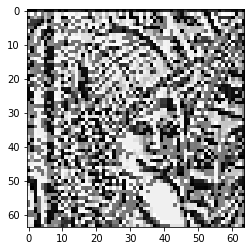

In [11]:
output = model.predict(np.array([im]))[0]
output = np.array(output)
output = output.astype(int)
print(output)

pyplot.imshow(output, cmap = 'gray') 
pyplot.show()

In [24]:
height_reshaped = 3
width_reshaped = 3
inputs = keras.Input(shape=(height_reshaped, width_reshaped, 1))
outputs = LBPLayer()(inputs)
model = keras.Model(inputs, outputs)
im = [[5, 8, 1],
      [5, 4, 1],
      [3, 7, 2]]
output = model.predict(np.array([im]))[0]
output = np.array(output)
output = output.astype(int)

print(output)
print(output.shape)
pyplot.imshow(output, cmap = 'gray') 
pyplot.show()



[[[-5 -5  3 -1  0 -5 -5 -5]
  [-8 -8 -7 -7 -4 -3 -3 -8]
  [-1 -1 -1 -1  0  3  7 -1]]

 [[ 0  3 -1  2 -2 -5 -5 -5]
  [ 4 -3 -3 -2  3 -1  1  1]
  [ 0 -1 -1 -1  1  6  3  7]]

 [[ 2  1  4 -3 -3 -3 -3 -3]
  [-3 -6 -5 -7 -7 -7 -4 -2]
  [-1 -2 -2 -2 -2 -2  5  2]]]
(3, 3, 8)


TypeError: Invalid shape (3, 3, 8) for image data